In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

import random as rn

from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr

# This line makes the plots display directly in the notebook, rather than in a separate window
%matplotlib inline

In [4]:
print('hello world')

hello world


In [354]:
pop_df     = pd.read_csv(".\\csv\\2018_central_trend_population.csv")
chldbnf_df = pd.read_csv(".\\csv\\child-benefit-by-family-size-borough.csv")
empind_df  = pd.read_csv(".\\csv\\employment-rate-by-industry_2017.csv")
empsup_df  = pd.read_csv(".\\csv\\employment-support-allowance-borough.csv")
fol_df     = pd.read_csv(".\\csv\\fol-2012-skills-data (1).csv")
gva_df     = pd.read_csv(".\\csv\\gva_county.csv")
gvaldn_df  = pd.read_csv(".\\csv\\regionalgrossvalueaddedbalancedbyindustrylocalauthoritiesukilondon.csv")
ldnbr_df   = pd.read_csv(".\\csv\\london-borough-profiles_bck.csv")
neets_df   = pd.read_csv(".\\csv\\neets-borough-region_NEET.csv")

In [355]:
pop_df.head()
neets_df.head()
fol_df.head()

,Borough,Year,Inner or Outer London,% 16-24 with NVQ1 or lower,% achieving 5 A*-C GCSE's inc. English & Maths (maintained schools),% pupils attending independent schools (school location),% of 16-64 in emp in managerial/professional/technical occs,% aged 18-24 in full time education,% 16-24 with NVQ3+,% pupils achieving 5 A*-C GCSE's (maintained schools),% 19 year olds achieving level 3 qualifications (maintained schools)
0,Barking and Dagenham,2005,Outer,40.8,37.7,0.0,32.1,19.9,29.4,55.8,27.1
1,Barking and Dagenham,2006,Outer,41.7,39.7,0.2,27.3,19.5,23.8,58.7,29.4
2,Barking and Dagenham,2007,Outer,38.1,39.2,0.2,28.8,24.4,30.1,58.4,30.0
3,Barking and Dagenham,2008,Outer,39.1,45.1,0.3,30.2,23.4,26.8,67.4,31.8
4,Barking and Dagenham,2009,Outer,27.4,51.6,0.3,36.1,35.3,42.7,76.5,35.8


In [356]:
chldbnf_df = chldbnf_df[["New Code","Area","Total_families","Total_children","Families_optedout"]]


In [357]:
pop_df = pop_df.query('year == 2018')[["gss_code","gss_name","year","population"]]

In [358]:
empsup_df = empsup_df[["Code","Area","Nov-18"]]

In [359]:
# df5.columns
fol_df=fol_df.query("Year==2010")
# unique(df5[["Year"]])
# df5.Year.unique

In [360]:
empsup_df.head()
fol_df.head()

,Borough,Year,Inner or Outer London,% 16-24 with NVQ1 or lower,% achieving 5 A*-C GCSE's inc. English & Maths (maintained schools),% pupils attending independent schools (school location),% of 16-64 in emp in managerial/professional/technical occs,% aged 18-24 in full time education,% 16-24 with NVQ3+,% pupils achieving 5 A*-C GCSE's (maintained schools),% 19 year olds achieving level 3 qualifications (maintained schools)
5,Barking and Dagenham,2010,Outer,33.1,56.6,0.0,33.5,21.7,33.4,80.7,40.3
11,Barnet,2010,Outer,26.0,67.5,11.8,56.6,42.6,54.6,85.6,65.1
17,Bexley,2010,Outer,31.3,63.0,1.3,43.1,22.7,35.9,86.9,48.8
23,Brent,2010,Outer,16.4,61.3,4.7,42.5,55.0,48.1,79.2,58.9
29,Bromley,2010,Outer,25.7,66.8,8.6,55.1,34.1,39.9,87.6,57.0


In [361]:
gvaldn_df.head()
# gva_df = gva_df[['Unnamed: 0','Unnamed: 1','2017']]
# gva_df.columns = ['code','name','2017']

,Region,LAD code,LA name,SIC07,SIC07 description,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,20183
0,London,E09000001,City of London,1-9; 35-39,"Agriculture, mining, electricity, gas, water a...",59.7,54.4,50.5,45.9,49.0,...,106.4,82.3,77.1,95.1,101.6,110.2,110.4,100.0,101.2,111.2
1,London,E09000001,City of London,ABDE,"Agriculture, mining, electricity, gas, water a...",59.7,54.4,50.5,45.9,49.0,...,106.4,82.3,77.1,95.1,101.6,110.2,110.4,100.0,101.2,111.2
2,London,E09000001,City of London,10-15,"Manufacture of food, beverages, textiles and c...",66.3,67.4,68.1,71.2,70.8,...,69.8,75.0,65.3,81.9,87.8,86.3,90.2,100.0,100.9,101.5
3,London,E09000001,City of London,CA-CB,"Manufacture of food, beverages, textiles and c...",66.3,67.4,68.1,71.2,70.8,...,69.8,75.0,65.3,81.9,87.8,86.3,90.2,100.0,100.9,101.5
4,London,E09000001,City of London,16-23,"Manufacture of wood, petroleum, chemicals and ...",79.7,77.5,78.2,78.6,76.3,...,92.2,87.9,90.1,94.2,95.0,94.1,97.1,100.0,102.4,103.4


In [362]:
neets_df = neets_df[["Code","Borough","2015","2015.1"]]

In [363]:
neets_df.head()

,Code,Borough,2015,2015.1
0,E09000001,City of London,0.0,0.0
1,E09000002,Barking & Dagenham,460.0,5.8
2,E09000003,Barnet,220.0,2.0
3,E09000004,Bexley,240.0,2.8
4,E09000005,Brent,240.0,2.2


In [462]:
gvaldn_df.head()
# pop_df.head()

,Region,LAD code,LA name,SIC07 description,20183
57,London,E09000001,City of London,All industries,104.5
115,London,E09000007,Camden,All industries,103.0
173,London,E09000033,Westminster,All industries,103.3
231,London,E09000013,Hammersmith and Fulham,All industries,101.4
289,London,E09000020,Kensington and Chelsea,All industries,101.7


In [365]:
temp_df = pd.merge(gva_df,pop_df,left_on="name",right_on="gss_name",how="inner")

KeyError: 'name'

In [366]:
temp_df.head()

,Region,LAD code,LA name,SIC07 description,20183,gss_code,gss_name,year,population,births,deaths,int_in,int_out,int_net,dom_in,dom_out,dom_net,total_change
0,London,E09000001,City of London,All industries,104.5,E09000001,City of London,2011,7412.758,79.0,34.0,899.943,483.185,416.758,886.322,853.880,32.442,494.201
1,London,E09000001,City of London,All industries,104.5,E09000001,City of London,2012,6594.289,56.0,36.0,714.392,1516.861,-802.470,850.128,894.461,-44.333,-826.803
2,London,E09000001,City of London,All industries,104.5,E09000001,City of London,2013,5957.695,71.0,27.0,624.000,1152.593,-528.593,627.999,821.000,-193.001,-677.594
3,London,E09000001,City of London,All industries,104.5,E09000001,City of London,2014,6005.972,68.0,33.0,699.832,841.554,-141.723,906.001,768.000,138.001,31.278
4,London,E09000001,City of London,All industries,104.5,E09000001,City of London,2015,6405.347,63.0,33.0,941.170,564.796,376.374,802.000,809.000,-7.000,399.375


In [461]:
gva_df.head()

,Unnamed: 0,Unnamed: 1,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,GEOUNIT_CD,GEOUNIT_NM,Data1Yr1,Data1Yr2,Data1Yr3,Data1Yr4,Data1Yr5,Data1Yr6,Data1Yr7,Data1Yr8,...,Data1Yr11,Data1Yr12,Data1Yr13,Data1Yr14,Data1Yr15,Data1Yr16,Data1Yr17,Data1Yr18,Data1Yr19,Data1Yr20
1,UKC11,Hartlepool and Stockton-on-Tees,11985,12716,12762,12938,13580,14567,15477,16479,...,17502,18122,17404,17617,17935,18182,19316,19472,19469,20020
2,UKC12,South Teesside,10194,10819,10990,10902,11690,12304,13715,14208,...,15545,15628,16162,16056,15861,16393,16225,16504,16592,16857
3,UKC13,Darlington,14213,14930,15487,17007,18634,20210,20750,20482,...,22525,21722,22400,22869,23244,22741,24736,26164,24954,25041
4,UKC14,Durham CC,9390,9490,9990,10269,10874,11475,11969,12512,...,14261,14385,14487,14270,14828,15352,15335,16135,16141,16617


In [368]:
ldnbr_df.head()

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2017,GLA Household Estimate 2017,Inland Area (Hectares),Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,E09000001,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [369]:
gvaldn_df.head()

,Region,LAD code,LA name,SIC07,SIC07 description,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,20183
0,London,E09000001,City of London,1-9; 35-39,"Agriculture, mining, electricity, gas, water a...",59.7,54.4,50.5,45.9,49.0,...,106.4,82.3,77.1,95.1,101.6,110.2,110.4,100.0,101.2,111.2
1,London,E09000001,City of London,ABDE,"Agriculture, mining, electricity, gas, water a...",59.7,54.4,50.5,45.9,49.0,...,106.4,82.3,77.1,95.1,101.6,110.2,110.4,100.0,101.2,111.2
2,London,E09000001,City of London,10-15,"Manufacture of food, beverages, textiles and c...",66.3,67.4,68.1,71.2,70.8,...,69.8,75.0,65.3,81.9,87.8,86.3,90.2,100.0,100.9,101.5
3,London,E09000001,City of London,CA-CB,"Manufacture of food, beverages, textiles and c...",66.3,67.4,68.1,71.2,70.8,...,69.8,75.0,65.3,81.9,87.8,86.3,90.2,100.0,100.9,101.5
4,London,E09000001,City of London,16-23,"Manufacture of wood, petroleum, chemicals and ...",79.7,77.5,78.2,78.6,76.3,...,92.2,87.9,90.1,94.2,95.0,94.1,97.1,100.0,102.4,103.4


In [370]:
gvaldn_df.columns
gvaldn_df = gvaldn_df[["Region","LAD code","LA name","SIC07 description","20183"]]

In [371]:
 gvaldn_df = gvaldn_df[gvaldn_df["SIC07 description"] == "All industries"]

In [469]:
 gvaldn_df['20183']= gvaldn_df['20183']*10

In [471]:
ldnbrpd_df = ldnbr_df[['Code','Area name','Population density (per hectare) 2017']]

In [472]:
fol_tmpdf = fol_df[['Borough','Year','% 16-24 with NVQ1 or lower']]

In [506]:
temp_df = pd.merge(gvaldn_df,pop_df,left_on="LAD code",right_on="gss_code",how="inner")
temp_df1 = pd.merge(temp_df,chldbnf_df,left_on="LAD code",right_on="New Code",how="inner")
temp_df2 = pd.merge(temp_df1,empind_df,left_on="LAD code",right_on="Code",how="inner")
temp_df3 = pd.merge(temp_df2,empsup_df,left_on="LAD code",right_on="Code",how="inner")
temp_df4 = pd.merge(temp_df3,neets_df,left_on="LAD code",right_on="Code",how="inner")
temp_df5 = pd.merge(temp_df4,fol_tmpdf,left_on="LA name",right_on="Borough",how="inner")
temp_df6 = pd.merge(temp_df5,ldnbrpd_df,left_on="LAD code",right_on="Code",how="inner")


In [507]:
temp_df6.columns
# pop_df.head()
# gvaldn_df.head()
# temp_df5.head()
main_df.dtypes

GVA 2018                        float64
Population                      float64
Children in Benefits             object
Employability %                 float64
Employment Support Allowance     object
NEET Rate                       float64
NVQ1 Lower(16-24)%              float64
Population Density 2017         float64
dtype: object

In [508]:
# fig = go.Figure()
# fig.add_trace(go.Box(y=main_df[['GVA 2018']]))
# fig.show()
gvaldn_df.head()
# main_df[['GVA 2018']]


,Region,LAD code,LA name,SIC07 description,20183
57,London,E09000001,City of London,All industries,1045.0
115,London,E09000007,Camden,All industries,1030.0
173,London,E09000033,Westminster,All industries,1033.0
231,London,E09000013,Hammersmith and Fulham,All industries,1014.0
289,London,E09000020,Kensington and Chelsea,All industries,1017.0


In [510]:
main_df=temp_df6[['20183','population','Total_children','percent','Nov-18','2015.1','% 16-24 with NVQ1 or lower','Population density (per hectare) 2017']]
main_df.columns = ["GVA 2018","Population","Children in Benefits","Employability %","Employment Support Allowance","NEET Rate","NVQ1 Lower(16-24)%","Population Density 2017"]

In [512]:
main_df.columns

Index(['GVA 2018', 'Population', 'Children in Benefits', 'Employability %',
       'Employment Support Allowance', 'NEET Rate', 'NVQ1 Lower(16-24)%',
       'Population Density 2017'],
      dtype='object')

In [513]:
mdf1 = main_df[['GVA 2018','Children in Benefits','Employment Support Allowance']]
main_df["Children in Benefits"] = mdf1["Children in Benefits"].str.replace(',', '')
main_df['Employment Support Allowance'] = mdf1['Employment Support Allowance'].str.replace(',', '')
main_df[['Children in Benefits','Employment Support Allowance']] = main_df[['Children in Benefits','Employment Support Allowance']].apply(pd.to_numeric)
# //.replace(',', '').astype(float)

C:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [514]:
main_df.dtypes

GVA 2018                        float64
Population                      float64
Children in Benefits              int64
Employability %                 float64
Employment Support Allowance      int64
NEET Rate                       float64
NVQ1 Lower(16-24)%              float64
Population Density 2017         float64
dtype: object

Text(0.5, 1.0, 'white')

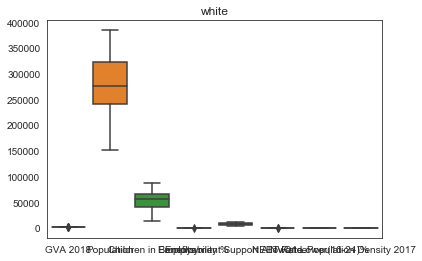

In [515]:
import seaborn as sn

sn.set_style("white")
sn.boxplot(data=main_df);
plt.title("white")

In [503]:
 main_df.corr()


,GVA 2018,Population,Employability %,NEET Rate,NVQ1 Lower(16-24)%,Population Density 2017
GVA 2018,1.000000,0.198098,0.234371,0.109011,0.102530,0.325279
Population,0.198098,1.000000,-0.126887,-0.048662,0.177361,-0.099093
Employability %,0.234371,-0.126887,1.000000,-0.181809,-0.337257,0.589352
NEET Rate,0.109011,-0.048662,-0.181809,1.000000,0.427495,-0.148080
NVQ1 Lower(16-24)%,0.102530,0.177361,-0.337257,0.427495,1.000000,-0.325850
Population Density 2017,0.325279,-0.099093,0.589352,-0.148080,-0.325850,1.000000


In [490]:
ldnbr_df[['Code','Area name','Population density (per hectare) 2017']].head()
# ldnbr_df.columns

,Code,Area name,Population density (per hectare) 2017
0,E09000001,City of London,30.3
1,E09000002,Barking and Dagenham,57.9
2,E09000003,Barnet,44.9
3,E09000004,Bexley,40.3
4,E09000005,Brent,76.8


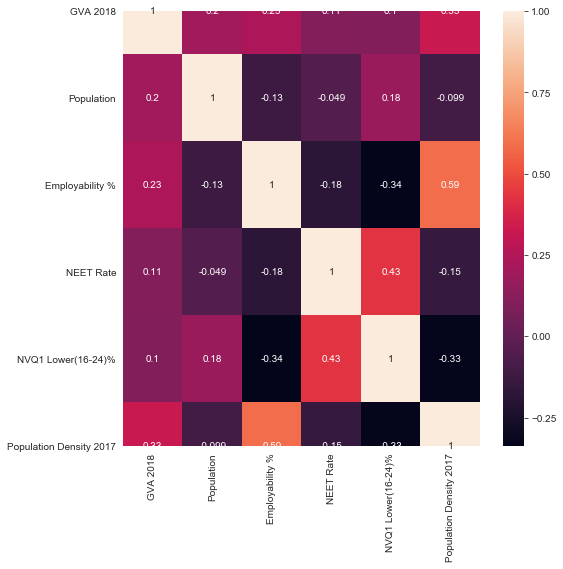

In [502]:
corrMatrix = main_df.corr()
plt.figure(figsize = (8,8))
sn.heatmap(corrMatrix, annot=True, annot_kws={"size": 10})

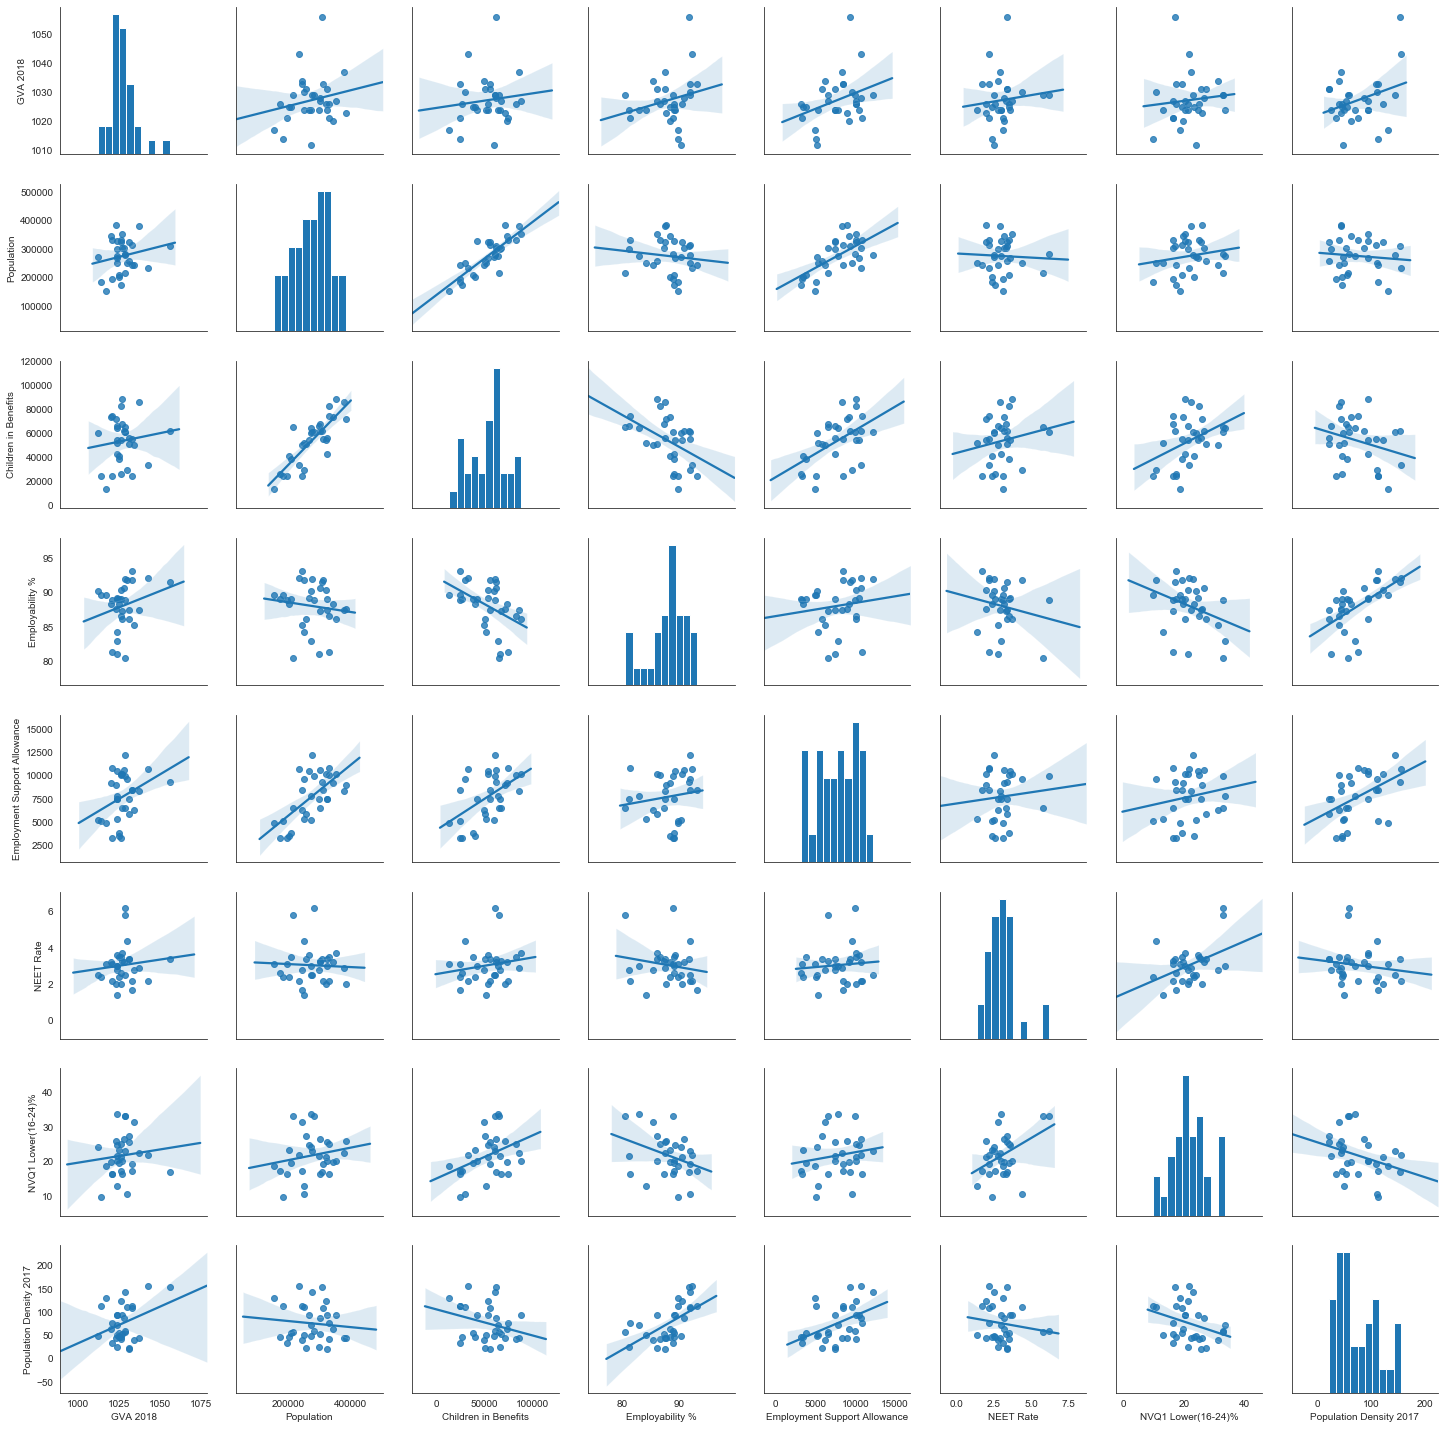

In [516]:
# with regression
sn.pairplot(main_df, kind="reg")
plt.show()

In [493]:
corr = main_df.corr("pearson")
print(corr)
# main_df.columns
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# f, ax = plt.subplots(figsize=(10, 10))
# cmap = sn.diverging_palette(220, 10, as_cmap=True)

# sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True)

#Pairplot the rest
# g = sn.pairplot(main_df.iloc[:,-5:],hue="GVA 2018")

                              GVA 2018  Population  Children Benefits  \
GVA 2018                      1.000000    0.198098           0.118738   
Population                    0.198098    1.000000           0.825521   
Children Benefits             0.118738    0.825521           1.000000   
Employability %               0.234371   -0.126887          -0.455277   
Employment Support Allowance  0.340136    0.644432           0.514862   
NEET Rate                     0.109011   -0.048662           0.174533   
NVQ1 Lower(16-24)%            0.102530    0.177361           0.397323   
Population Density 2017       0.325279   -0.099093          -0.275568   

                              Employability %  Employment Support Allowance  \
GVA 2018                             0.234371                      0.340136   
Population                          -0.126887                      0.644432   
Children Benefits                   -0.455277                      0.514862   
Employability %           

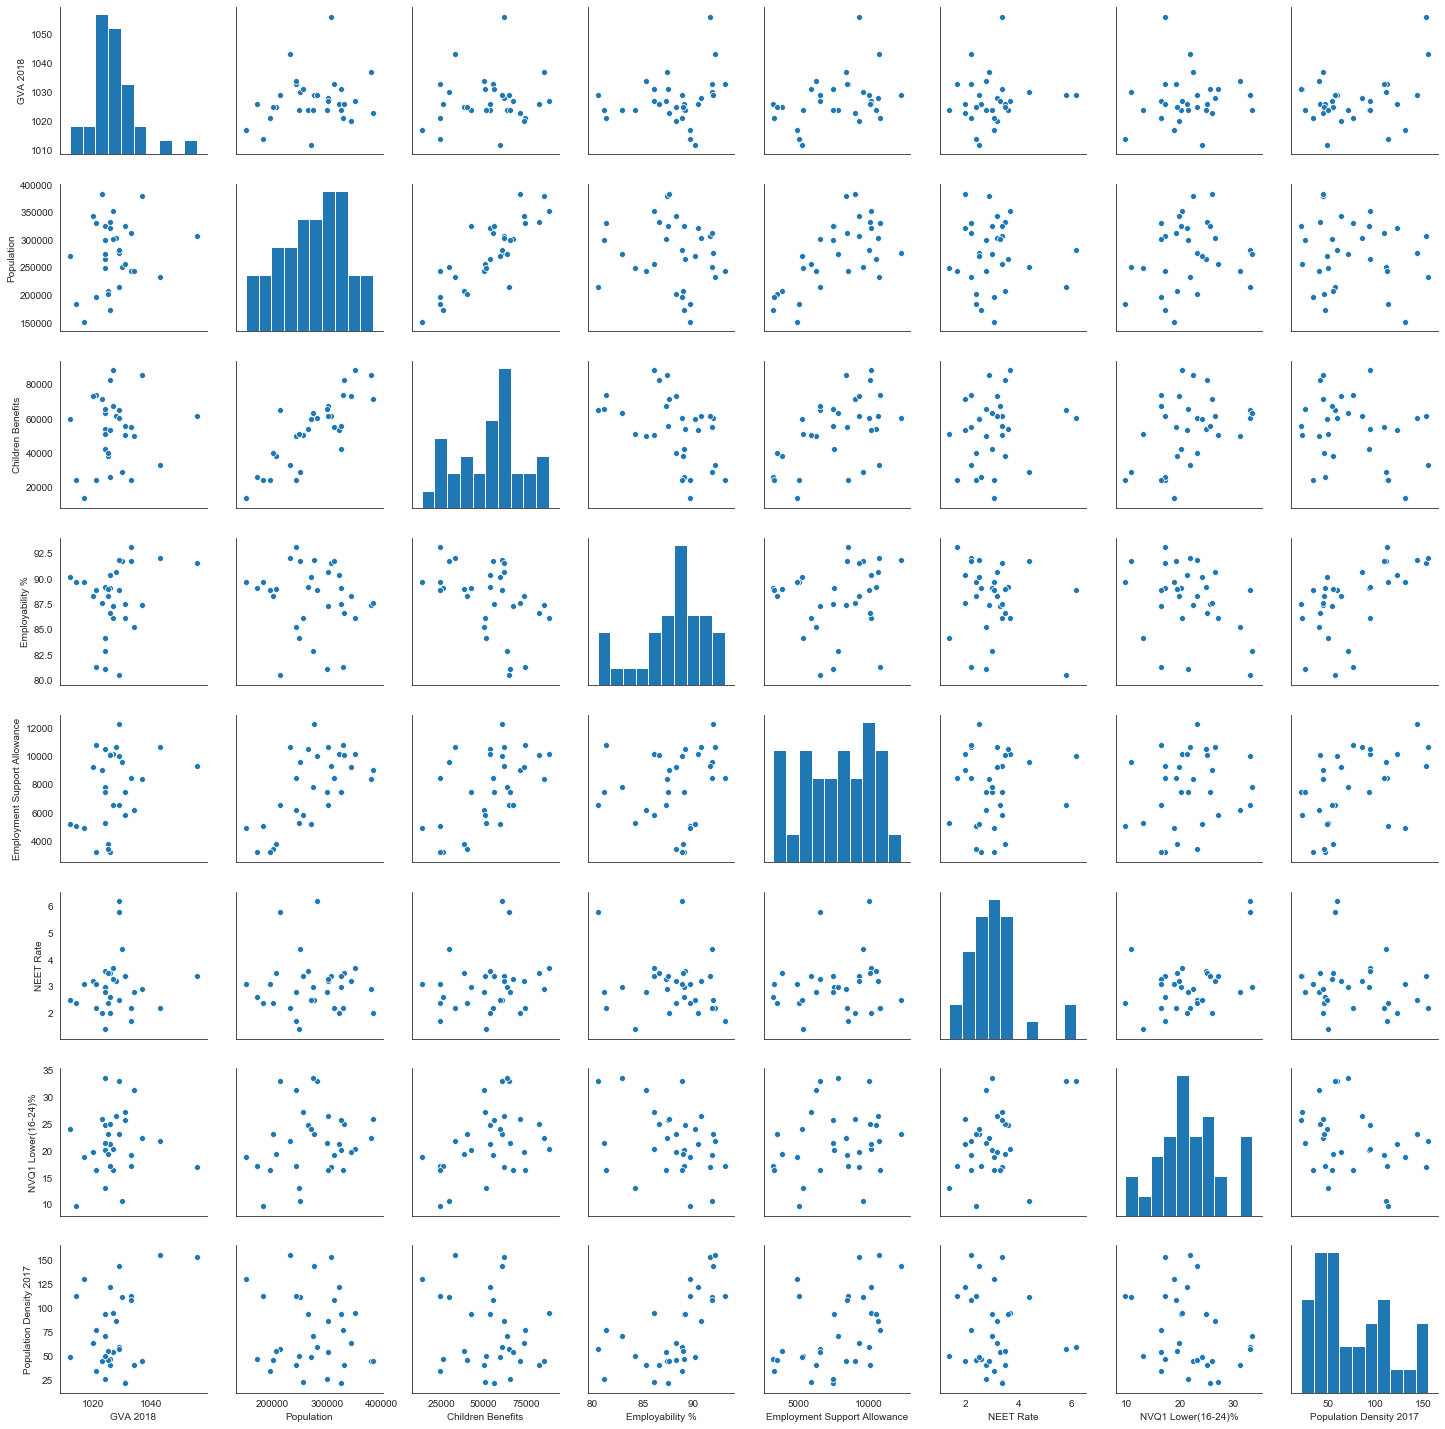

In [500]:
# without regression
sn.pairplot(main_df, kind="scatter")
plt.show()

C:\Softwares\Anaconda\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Softwares\Anaconda\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars

C:\Softwares\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Softwares\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



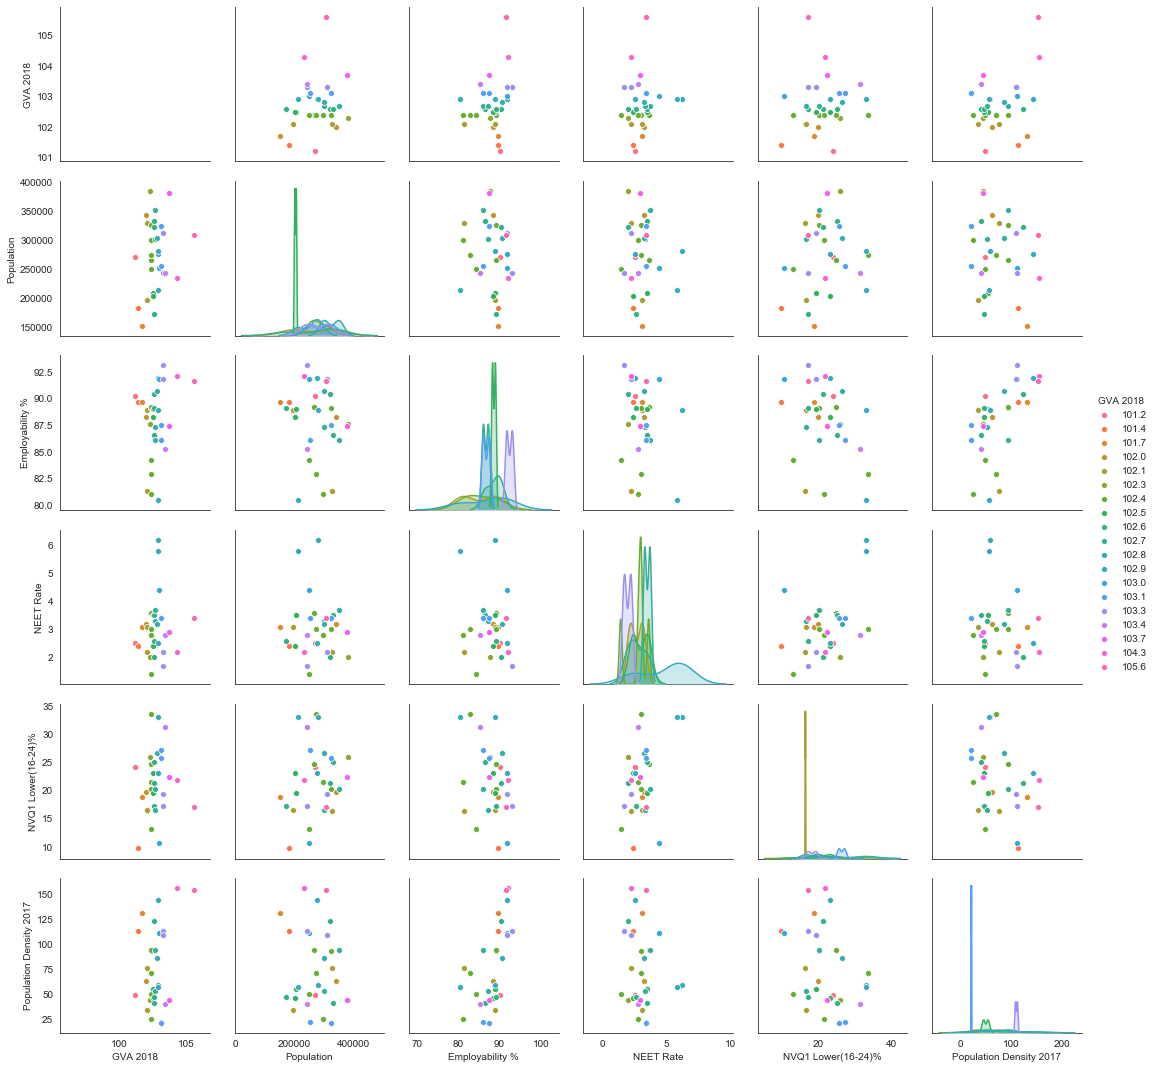

In [394]:
g = sn.pairplot(main_df, hue="GVA 2018")
g

In [526]:
import plotly.express as px
import numpy as np


fig = px.scatter_3d(main_df,
        x='Population',
        y='Children in Benefits',
        z='Employment Support Allowance',
#         mode='markers',
            size='Population Density 2017',
            color="NEET Rate",                # set color to an array/list of desired values
            opacity=0.8

)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [527]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(main_df, x="Population Density 2017", y="Children in Benefits", color="Employment Support Allowance",
                 size='Population')
fig.show()

In [517]:
def linearRegression(xvals,yvals):
    X_values = sms.add_constant(xvals)
    regression_model_a = sms.OLS(yvals, X_values)
    regression_model_b = regression_model_a.fit()
    # and print a summary of the results:
#     print(regression_model_b.summary())
    print() # blank line

    # Now we store all the relevant values:
    gradient  = regression_model_b.params[1]
    intercept = regression_model_b.params[0]
    Rsquared  = regression_model_b.rsquared
    MSE       = regression_model_b.mse_resid
    pvalue    = regression_model_b.f_pvalue

    # And print them:
    print("gradient  =", regression_model_b.params[1])
    print("intercept =", regression_model_b.params[0])
    print("Rsquared  =", regression_model_b.rsquared)
    print("MSE       =", regression_model_b.mse_resid)
    print("pvalue    =", regression_model_b.f_pvalue)

    # This line creates the endpoints of the best-fit line:
    x_lobf = [min(xvals),max(xvals)]
    y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

    # This line creates the figure. 
    plt.figure(figsize=(5,5))
    plt.plot(xvals,yvals,'b.',x_lobf,y_lobf,'r--')


C:\Softwares\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.




gradient  = 1457.2634330542032
intercept = -1221906.4669309636
Rsquared  = 0.039242809246741395
MSE       = 3563941351.123775
pvalue    = 0.2771064597325389

gradient  = 0.09488200343428738
intercept = -9.417378090478849
Rsquared  = 0.054929894313571204
MSE       = 10.617537769538197
pvalue    = 0.1966596189729117

gradient  = 0.013521357910253903
intercept = -10.84648745574303
Rsquared  = 0.011883473853801618
MSE       = 1.0420923913869344
pvalue    = 0.5525781863262891

gradient  = 0.07577157445255464
intercept = -56.085592718088535
Rsquared  = 0.010512377876327306
MSE       = 37.044427289903325
pvalue    = 0.5765740068728549

gradient  = 1.565593325937995
intercept = -1532.448418861242
Rsquared  = 0.10580613445018805
MSE       = 1419.971475425612
pvalue    = 0.06927743013022886

gradient  = 281.3311653775185
intercept = -235669.98123297415
Rsquared  = 0.014098770208535671
MSE       = 379392486.8644928
pvalue    = 0.5174654219576806

gradient  = 105.86062273010596
intercept = -10102

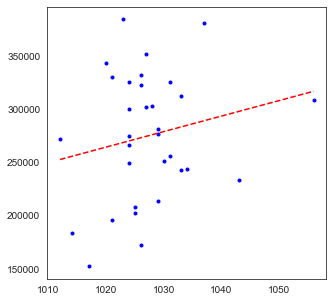

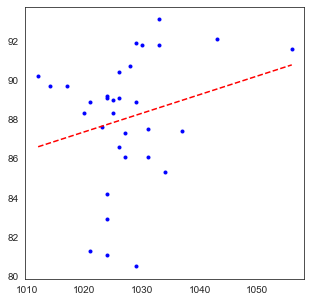

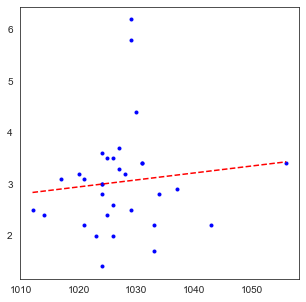

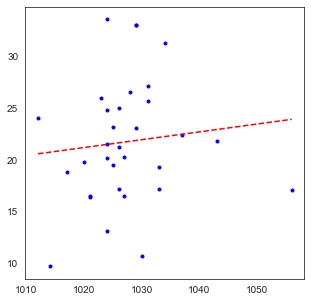

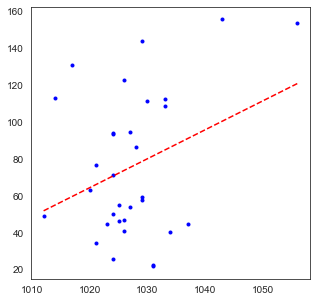

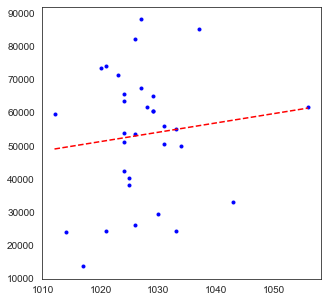

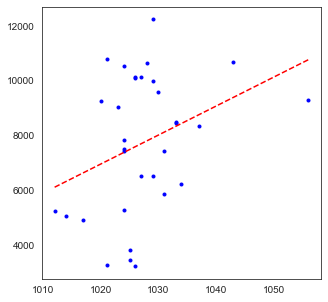

In [518]:
import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np

linearRegression(main_df['GVA 2018'], main_df['Population'])
linearRegression(main_df['GVA 2018'], main_df['Employability %'])
linearRegression(main_df['GVA 2018'], main_df['NEET Rate'])
linearRegression(main_df['GVA 2018'], main_df['NVQ1 Lower(16-24)%'])
linearRegression(main_df['GVA 2018'], main_df['Population Density 2017'])
linearRegression(main_df['GVA 2018'], main_df['Children in Benefits'])
linearRegression(main_df['GVA 2018'], main_df['Employment Support Allowance'])

# linearRegression(main_df[['GVA 2018']], main_df[["Children Benefits"]])
# main_df.columns

In [522]:
# The next lines import the necessary packages to perform the regression:
import statsmodels.api as sms
import numpy as np


# If there are errors importing the data, you can also copy it in as follows:
# e.g. data = [[737.4776314, 34, 65],
#              [869.2063792, 57, 73],
#              [1033.705248, 59, 100],
#              ...
#              [737.5129466, 66, 49]]
# (Compare this example with the file demo_multreg_data_example.csv)

# These lines extract the y-values and the x-values from the data:
y_values = main_df['Population Density 2017']
x_values = main_df[['Children in Benefits','Employment Support Allowance']]
# print(data)

# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
# print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
predictor_coeffs  = regression_model_b.params[1:]
constant          = regression_model_b.params[0] # called the 'intercept' in simple regression
Rsquared          = regression_model_b.rsquared
MSE               = regression_model_b.mse_resid
pvalues_T         = regression_model_b.pvalues[1:]
pvalue_F          = regression_model_b.f_pvalue

# Note that predictor_coeffs is a list of the best-fit coefficients for x1, x2, x3, ...
# Similarly, pvalues_T is a list of the p-values associated with each of these variables in turn.

# Print these summary stats:
print("predictor coefficients =", predictor_coeffs)
print("constant               =", constant)
print("Rsquared               =", Rsquared)
print("MSE                    =", MSE)
print("T-test pvalues         =", pvalues_T)
print("F-test pvalue          =", pvalue_F)


predictor coefficients = Children in Benefits           -0.001432
Employment Support Allowance    0.012899
dtype: float64
constant               = 52.616114690724224
Rsquared               = 0.5872592444967561
MSE                    = 678.0294313392087
T-test pvalues         = Children in Benefits            0.000021
Employment Support Allowance    0.000002
dtype: float64
F-test pvalue          = 2.674986807197397e-06
